### Libraries

In [2]:
# --------------------------------------------------------------
# System utilities
# --------------------------------------------------------------
import os
import joblib

# --------------------------------------------------------------
# Data manipulation libraries
# --------------------------------------------------------------
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Support for large, multi-dimensional arrays and matrices

# --------------------------------------------------------------
# Data visualization libraries
# --------------------------------------------------------------
import matplotlib.pyplot as plt  # 2D plotting library
import seaborn as sns            # Statistical data visualization built on top of Matplotlib
import plotly.express as px      # Interactive visualizations for data exploration
import plotly.graph_objects as go  # Low-level interface for creating more complex Plotly visualizations

# --------------------------------------------------------------
# Machine learning models and metrics from scikit-learn
# --------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Feature scaling methods
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold  # Model selection and validation
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.tree import DecisionTreeClassifier      # Decision Tree classifier
from sklearn.metrics import (                        # Model evaluation metrics
    classification_report, confusion_matrix, 
    roc_curve, roc_auc_score, 
    mean_squared_error, mean_absolute_error, r2_score, 
    accuracy_score, precision_score, recall_score, f1_score, 
    make_scorer)

# --------------------------------------------------------------
# Libraries for handling imbalanced datasets
# --------------------------------------------------------------
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique for class imbalance
from imblearn.pipeline import Pipeline    # Pipeline for combining steps in model training and evaluation

# --------------------------------------------------------------
# Advanced visualization utilities for interactive plots
# --------------------------------------------------------------
from plotly.subplots import make_subplots  # Create complex multi-plot visualizations

In [3]:
# Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..','data','03_primary','3.spotify.csv')

# Load the CSV file
spotify = pd.read_csv(ruta_csv_relativa)

In [4]:
spotify

,duration_ms_scaled,popularity_scaled,speechiness_scaled,acousticness_scaled,instrumentalness_scaled,liveness_scaled,loudness_scaled,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,track_genre,track_genre_encoded,intensity,popularity_class
0,0.461947,0.920689,0.494433,0.751530,0.050533,0.780650,0.506999,0.669059,0.460989,0.718593,0.301970,acoustic,0,0.311636,1
1,0.387347,0.849624,0.328098,0.994567,0.136151,0.510439,0.344792,0.394881,0.165983,0.268342,0.243282,acoustic,0,0.069720,1
2,0.446450,0.858572,0.244770,0.887294,0.000000,0.541840,0.441037,0.414159,0.358987,0.120603,0.236770,acoustic,0,0.157242,1
3,0.439024,0.913703,0.131397,0.993063,0.309253,0.567599,0.336466,0.229945,0.059581,0.143719,0.830006,acoustic,0,0.015854,1
4,0.436375,0.949954,0.229607,0.945470,0.000000,0.468269,0.442250,0.606940,0.442989,0.167839,0.482246,acoustic,0,0.273774,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113794,0.550216,0.611400,0.171275,0.967978,0.994591,0.476852,0.352127,0.129271,0.234985,0.034070,0.516273,world-music,113,0.040420,0
113795,0.550216,0.622734,0.157759,0.999854,0.998242,0.518733,0.338495,0.131413,0.116982,0.035176,0.286899,world-music,113,0.020358,0
113796,0.490010,0.622734,0.170017,0.989957,0.000000,0.470829,0.421202,0.618721,0.328986,0.746734,0.552197,world-music,113,0.206941,0
113797,0.497723,0.776273,0.078262,0.930424,0.000000,0.720409,0.421296,0.573739,0.505990,0.415075,0.572356,world-music,113,0.297022,1


# Classification Model

## Predictor sets

Four sets of predictors were created, which will be trained by multiple classification models.

In [8]:
# Predictor sets
predictors_essential = ['danceability_scaled', 'energy_scaled', 'loudness_scaled', 'speechiness_scaled', 'intensity']
predictors_simplified = ['loudness_scaled', 'intensity', 'speechiness_scaled']
predictors_moderate = ['danceability_scaled', 'energy_scaled', 'loudness_scaled', 'speechiness_scaled', 'valence_scaled', 'intensity']
predictors_complete = ['danceability_scaled', 'energy_scaled', 'loudness_scaled', 'speechiness_scaled', 'acousticness_scaled', 'instrumentalness_scaled',
                       'liveness_scaled', 'valence_scaled', 'intensity']

## Train Model

In [5]:
def train_multiple_baseline_models(X, y):
    """

    This function trains multiple classification models with default parameters (baseline models)
    and displays performance metrics for each model, including the ROC curve and AUC.

    Parameters:
    - X: Feature set.
    - y: Target labels.

    Return:
    - results: List of dictionaries containing model performance metrics.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Models to be trained
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
    }

    # Store results for ROC curves
    roc_curves = []

    # Iterate over the models and train each one
    results = []
    for model_name, model in models.items():
        print(f"\nTraining and evaluation: {model_name}")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Predict probabilities for ROC curve (if the model supports it)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1] # Probability of the positive class
        else:
            y_prob = None # For models without predict_proba (e.g, SVM with Linear kernel)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion_mtx = confusion_matrix(y_test, y_pred)

        # Calculate ROC curve and AUC if probabilities are available
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc = roc_auc_score(y_test, y_prob)

            # Store the ROC curve results
            roc_curves.append((fpr, tpr, model_name, auc))

        else:
            auc = 'N/A'

        # Save the results
        results.append({
            'model': model_name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': confusion_mtx,
            'AUC': auc
        })

        # Display the metrics
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"AUC: {auc}")
        print("Confusion Matrix:")
        print(confusion_mtx)

    # Plot all ROC curves at the end
    plt.figure()
    for fpr, tpr, model_name, auc in roc_curves:
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

    return results

## Models

### predictors_essential


Training and evaluation: Logistic Regression
Accuracy: 0.5577
Precision: 0.5556
Recall: 0.5577
F1 Score: 0.5524
AUC: 0.5809036012628297
Confusion Matrix:
[[7889 4041]
 [6026 4804]]

Training and evaluation: Random Forest
Accuracy: 0.7305
Precision: 0.7314
Recall: 0.7305
F1 Score: 0.7306
AUC: 0.8314641464250911
Confusion Matrix:
[[8635 3295]
 [2839 7991]]

Training and evaluation: Decision Tree
Accuracy: 0.7009
Precision: 0.7015
Recall: 0.7009
F1 Score: 0.7010
AUC: 0.6992302899570363
Confusion Matrix:
[[8350 3580]
 [3228 7602]]


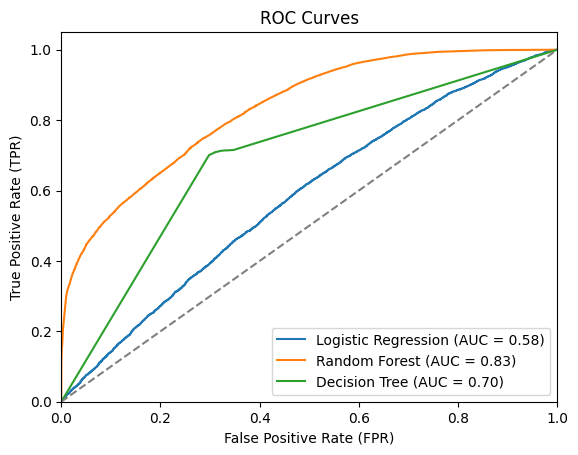

In [6]:
# Example usage
# X and y are your data (X: features, y: labels)
X = spotify[predictors_essential]  # Your features
y = spotify['popularity_class']    # Your label or target variable

results = train_multiple_baseline_models(X, y)

### predictors_simplified


Training and evaluation: Logistic Regression
Accuracy: 0.5486
Precision: 0.5460
Recall: 0.5486
F1 Score: 0.5381
AUC: 0.5580833718389591
Confusion Matrix:
[[8252 3678]
 [6595 4235]]

Training and evaluation: Random Forest
Accuracy: 0.7055
Precision: 0.7061
Recall: 0.7055
F1 Score: 0.7057
AUC: 0.8099754067084153
Confusion Matrix:
[[8410 3520]
 [3182 7648]]

Training and evaluation: Decision Tree
Accuracy: 0.6901
Precision: 0.6907
Recall: 0.6901
F1 Score: 0.6902
AUC: 0.6875314759303075
Confusion Matrix:
[[8241 3689]
 [3365 7465]]


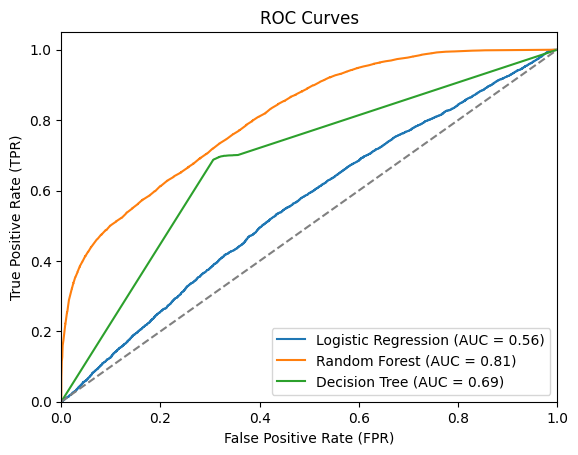

In [7]:
X = spotify[predictors_simplified] 
y = spotify['popularity_class']  

results = train_multiple_baseline_models(X, y)

### predictors_moderate


Training and evaluation: Logistic Regression
Accuracy: 0.5790
Precision: 0.5777
Recall: 0.5790
F1 Score: 0.5741
AUC: 0.601860777589184
Confusion Matrix:
[[8105 3825]
 [5758 5072]]

Training and evaluation: Random Forest
Accuracy: 0.7442
Precision: 0.7446
Recall: 0.7442
F1 Score: 0.7443
AUC: 0.845620702946319
Confusion Matrix:
[[8878 3052]
 [2771 8059]]

Training and evaluation: Decision Tree
Accuracy: 0.7072
Precision: 0.7075
Recall: 0.7072
F1 Score: 0.7073
AUC: 0.7050543258264776
Confusion Matrix:
[[8525 3405]
 [3258 7572]]


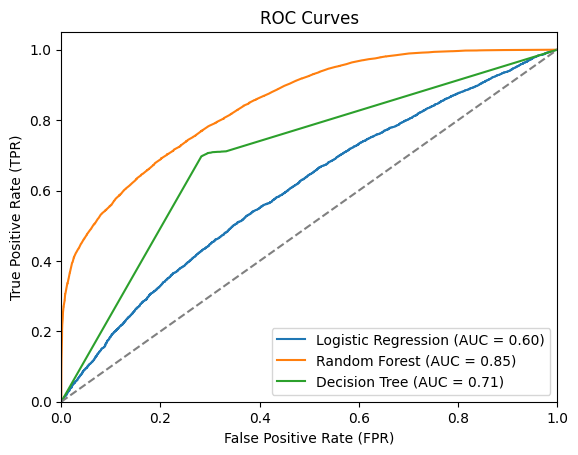

In [8]:
X = spotify[predictors_moderate] 
y = spotify['popularity_class']  

results = train_multiple_baseline_models(X, y)

### predictors_complete


Training and evaluation: Logistic Regression
Accuracy: 0.5906
Precision: 0.5895
Recall: 0.5906
F1 Score: 0.5884
AUC: 0.6266213964345726
Confusion Matrix:
[[7877 4053]
 [5264 5566]]

Training and evaluation: Random Forest
Accuracy: 0.7630
Precision: 0.7634
Recall: 0.7630
F1 Score: 0.7631
AUC: 0.8655014554739522
Confusion Matrix:
[[9085 2845]
 [2550 8280]]

Training and evaluation: Decision Tree
Accuracy: 0.7184
Precision: 0.7188
Recall: 0.7184
F1 Score: 0.7185
AUC: 0.7168112117546258
Confusion Matrix:
[[8612 3318]
 [3091 7739]]


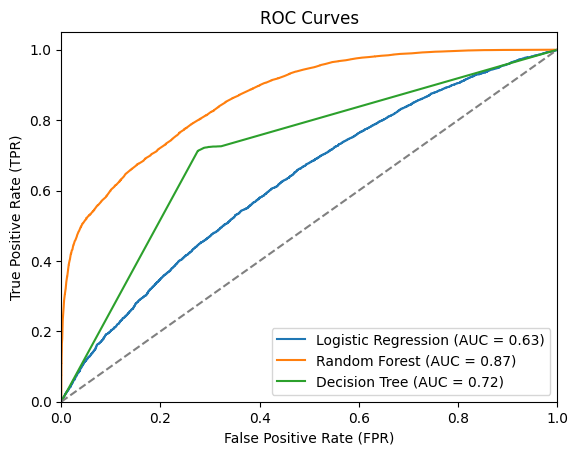

In [9]:
X = spotify[predictors_complete]  
y = spotify['popularity_class']  

results = train_multiple_baseline_models(X, y)

Comparando los 4 modelos y sus predictores, el mejor modelo encontrado es el modelo de bosque aleatorio con el conjunto predictors_complete. Este modelo se ejecutará a través de Hyperparameters para mejorar sus métricas.

## Hyperparameter - GridSerachCV

In [10]:
def optimize_simple_model(model, param_grid, X, y, test_size, scoring):
    """
    This function optimizes a model's hyperparameters using GridSearchCV and returns the best model with its metrics.

    Parameters:
    - model: The model to be trained (e.g., RandomForestClassifier()).
    - param_grid: A dictionary of hyperparameters for GridSearchCV.
    - X: Feature set.
    - y: Target labels (dependent variable).
    - test_size: Proportion of data for the test set (default is 0.2).
    - scoring: Metric to optimize (default is 'accuracy').

    Returns:
    - best_model: The model with the best hyperparameters.
    - metrics: A dictionary containing performance metrics (accuracy, precision, recall, f1 score).
    """

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Create GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1)

    # Train the model with the training data
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Create a dictionary with the metrics
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Display results
    print(f"Best hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])

    return best_model, metrics

### Train Hyperparameter

In [11]:
# Example usage:
# Parameters to optimize for RandomForest
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Assume you already have your features (X) and target variable (y)
X = spotify[predictors_complete]  # Your features -- predictors_complete
y = spotify['popularity_class']   # Your target variable

# Call the function to optimize the model
best_model_rf, metrics_rf = optimize_simple_model(
    RandomForestClassifier(random_state=50),
    param_grid_rf,
    X,
    y,
    test_size=0.2,
    scoring='accuracy'
)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.7660
Precision: 0.7666
Recall: 0.7660
F1 Score: 0.7662
Confusion Matrix:
[[9101 2829]
 [2496 8334]]


As the model has not performed as expected, the SMOTE library will be tested to balance the data with its hyperparameters.

## SMOTE with Hyperparameter

In [12]:
def optimize_model_smote(model, param_grid, X, y, model_path, test_size=0.2, scoring='accuracy'):
    """
    This function optimizes a model's hyperparameters using GridSearchCV and SMOTE,
    returning the best model with its metrics and saving it to a file.

    Parameters:
    - model: The model to be trained (e.g., RandomForestClassifier()).
    - param_grid: A dictionary of hyperparameters for GridSearchCV.
    - X: Feature set.
    - y: Target labels (dependent variable).
    - model_path: File path where the best model will be saved (default is 'best_model.pkl').
    - test_size: Proportion of data for the test set (default is 0.2).
    - scoring: Metric to optimize (default is 'accuracy').

    Returns:
    - best_model: The model with the best hyperparameters.
    - metrics: A dictionary containing performance metrics (accuracy, precision, recall, f1 score).
    """

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Create a pipeline that applies SMOTE and then trains the model
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),  # Apply SMOTE to the training set
        ('model', model)  # The model to be optimized
    ])

    # Create GridSearchCV on the pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, n_jobs=-1)

    # Train with the training data
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Create a dictionary with the metrics
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Display results
    print(f"Best hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])

    # Save the model to a file
    try:
        joblib.dump(best_model, model_path)
        print(f"Model saved at: {model_path}")
    except Exception as e:
        print(f"Error saving the model: {e}")

    return best_model, metrics


### Train SMOTE with Hyperparameter 

In [ ]:
# Call the function to optimize and save the model
best_model, metrics = optimize_model_smote(
    model = RandomForestClassifier(random_state=42), 
    param_grid = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
    },
    X = X, 
    y = y, 
    model_path='../data/06_models/random_forest_model.pkl'
)

The results were not as expected, so it was decided to continue working with the base model, as this way the execution will be much faster than with the hyperparameters.

## Random Forest Model

In [9]:
# Define features (predictors_complete) and the target (popularity_class)
X = spotify[predictors_complete]  # Your features
y = spotify['popularity_class']   # Your target variable

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (RandomForestClassifier)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Define the path to save the model
model_path = '../data/06_models/simple_random_forest_model.pkl'

# Save the trained model
joblib.dump(rf, model_path)
print(f"Model saved as {model_path}")

Model saved as ../data/06_models/simple_random_forest_model.pkl


The model is stored so that it can be used without the need for continuous training.

### simple_random_forest_model metrics

Model loaded successfully
Accuracy: 0.7630
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     11930
           1       0.74      0.76      0.75     10830

    accuracy                           0.76     22760
   macro avg       0.76      0.76      0.76     22760
weighted avg       0.76      0.76      0.76     22760

Confusion Matrix:
[[9085 2845]
 [2550 8280]]
ROC-AUC: 0.8655


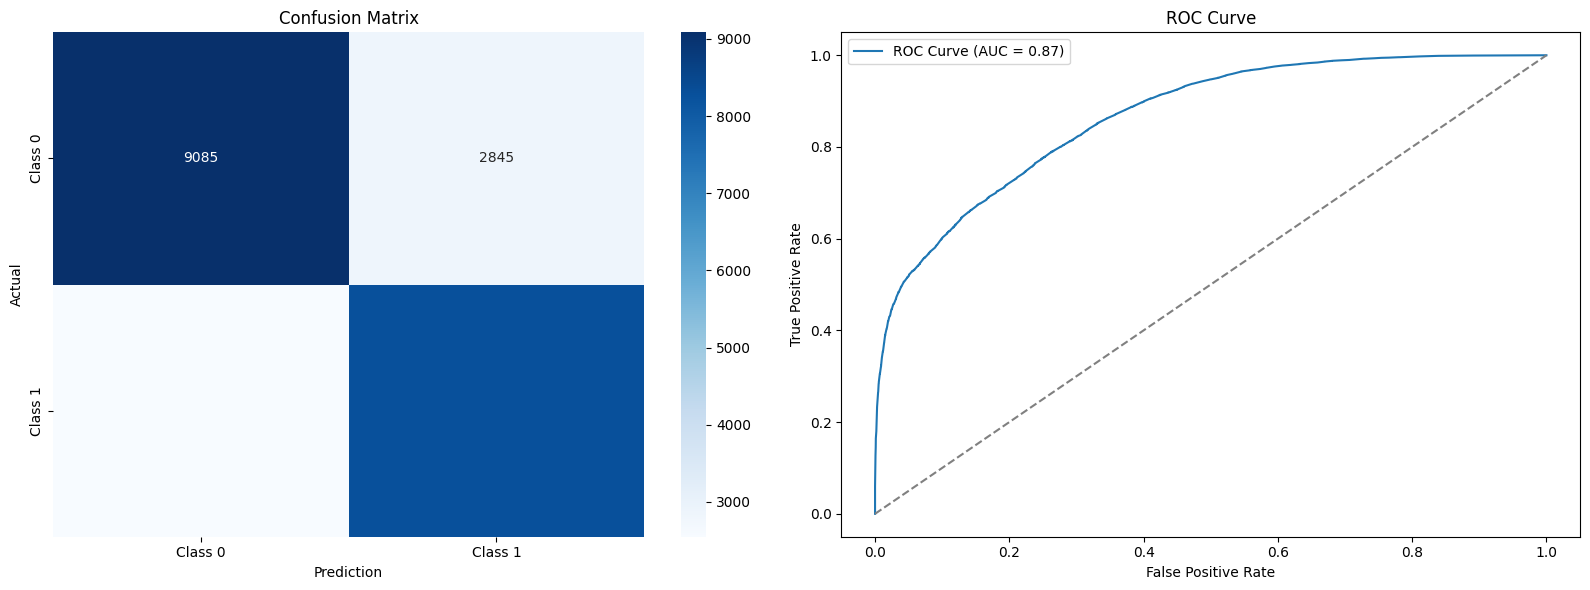

In [10]:
# Load the saved model
rf = joblib.load('../data/06_models/simple_random_forest_model.pkl')
print("Model loaded successfully")

# Make predictions on the test set
y_pred = rf.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# 4. ROC-AUC (For binary classification)
if len(set(y_test)) == 2:
    y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probability of the positive class
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Get ROC curve values
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Create subplots to show the confusion matrix and ROC curve together
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Subplot 1: Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=ax[0])
    ax[0].set_xlabel('Prediction')
    ax[0].set_ylabel('Actual')
    ax[0].set_title('Confusion Matrix')

    # Subplot 2: ROC Curve
    ax[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('ROC Curve')
    ax[1].legend(loc='best')

    # Show both plots
    plt.tight_layout()
    plt.show()


The performance of the model will be evaluated using cross-validation, k-fold cross-validation and stratified cross-validation techniques.

## CROOS VALIDATION

In [29]:
def evaluate_model(model, X, y, cv_folds, metrics=['accuracy', 'precision', 'recall', 'roc_auc']):
    """
    Function that takes a model, features (X), target (y), and evaluates it using cross-validation.
    
    Parameters:
    - model: The machine learning model (e.g., RandomForestClassifier()).
    - X: Input features.
    - y: Target or dependent variable.
    - metrics: List of metrics to evaluate (default: 'accuracy', 'precision', 'recall', 'roc_auc').
    - cv_folds: Number of folds for cross-validation (default: 5).
    
    Returns:
    - Cross-validation results: Averages of metrics and timing information.
    """
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply cross-validation
    cv_results = cross_validate(model, X_scaled, y, cv=cv_folds, scoring=metrics, return_train_score=True)

    # Display the results of the metrics and timing
    print("Cross-validation results:")
    
    for metric in metrics:
        print(f"Mean {metric.capitalize()}: {cv_results[f'test_{metric}'].mean():.4f}")
    
    print(f"Mean Training Time: {cv_results['fit_time'].mean():.4f} seconds")
    print(f"Mean Prediction Time: {cv_results['score_time'].mean():.4f} seconds")
    
    return cv_results

### Train cross validation

In [23]:
# Example usage
# Define features and target
X = spotify[predictors_complete]
y = spotify['popularity_class']

# Define the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Number of folds to train
cv_folds = 10  # 5 - 10

# Call the function to evaluate the model
results = evaluate_model(rf, X, y, cv_folds)


Cross-validation results:
Mean Accuracy: 0.7112
Mean Precision: 0.6835
Mean Recall: 0.7306
Mean Roc_auc: 0.8071
Mean Training Time: 30.4785 seconds
Mean Prediction Time: 0.4289 seconds


## K-FOLD CROSS VALIDATION

In [13]:
def perform_k_fold_cv(model, X, y, cv=5, scoring=None):
    """
    This function performs K-Fold Cross-Validation on a given model and returns the metrics for each fold.

    Parameters:
    - model: The model to be evaluated (e.g., RandomForestClassifier()).
    - X: Feature set.
    - y: Target labels (dependent variable).
    - cv: Number of folds for K-Fold Cross-Validation (default is 5).
    - scoring: A dictionary of metrics to evaluate (optional).

    Returns:
    - results: A dictionary with the average metrics obtained.
    """
    # If no scoring metrics are specified, we use accuracy, precision, recall, and F1 by default
    if scoring is None:
        scoring = {
            'accuracy': 'accuracy',
            'precision': make_scorer(precision_score, average='weighted'),
            'recall': make_scorer(recall_score, average='weighted'),
            'f1': make_scorer(f1_score, average='weighted')
        }

    # Perform cross-validation with the specified model
    results = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)

    # Display the metrics for each fold
    for i in range(cv):
        print(f"Fold {i + 1}:")
        for metric in scoring.keys():
            print(f"    {metric.capitalize()}: {results[f'test_{metric}'][i]:.4f}")
        print(f"    Training Time: {results['fit_time'][i]:.4f} seconds")
        print(f"    Prediction Time: {results['score_time'][i]:.4f} seconds")
        print()

    # Calculate and display the average metrics
    metrics_avg = {metric: results[f'test_{metric}'].mean() for metric in scoring}
    metrics_avg['mean_training_time'] = results['fit_time'].mean()
    metrics_avg['mean_prediction_time'] = results['score_time'].mean()

    
    print("Average metrics:")
    for metric, avg in metrics_avg.items():
        print(f"{metric.replace('_', ' ').capitalize()} average: {avg:.4f} seconds" if 'time' in metric else f"{metric.capitalize()} average: {avg:.4f}")

    return metrics_avg

### Train K-FOLD

In [14]:
# Load the saved model
loaded_model = joblib.load('../data/06_models/simple_random_forest_model.pkl')

# Assume you already have your X and y data defined
# Call the cross-validation function with the loaded model
average_results = perform_k_fold_cv(loaded_model, X, y, cv=10)

Fold 1:
    Accuracy: 0.7236
    Precision: 0.7236
    Recall: 0.7236
    F1: 0.7236
    Training Time: 45.4336 seconds
    Prediction Time: 0.3058 seconds

Fold 2:
    Accuracy: 0.6787
    Precision: 0.6802
    Recall: 0.6787
    F1: 0.6790
    Training Time: 44.1614 seconds
    Prediction Time: 0.3301 seconds

Fold 3:
    Accuracy: 0.7530
    Precision: 0.7538
    Recall: 0.7530
    F1: 0.7531
    Training Time: 45.4748 seconds
    Prediction Time: 0.3368 seconds

Fold 4:
    Accuracy: 0.7200
    Precision: 0.7215
    Recall: 0.7200
    F1: 0.7202
    Training Time: 44.4743 seconds
    Prediction Time: 0.2905 seconds

Fold 5:
    Accuracy: 0.7098
    Precision: 0.7129
    Recall: 0.7098
    F1: 0.7098
    Training Time: 45.2535 seconds
    Prediction Time: 0.3622 seconds

Fold 6:
    Accuracy: 0.7053
    Precision: 0.7121
    Recall: 0.7053
    F1: 0.7048
    Training Time: 44.8763 seconds
    Prediction Time: 0.3018 seconds

Fold 7:
    Accuracy: 0.6871
    Precision: 0.6889
    Rec

## STRATIFIED K-FOLD CROSS VALIDATION

In [27]:
def evaluate_stratified_model(model, X, y, cv_folds, metrics=['accuracy', 'precision', 'recall', 'roc_auc']):
    """
    Function that takes a model, features (X), target (y), and evaluates it using stratified cross-validation.
    
    Parameters:
    - model: The machine learning model.
    - X: Input features.
    - y: Target or dependent variable.
    - metrics: List of metrics to evaluate (default: 'accuracy', 'precision', 'recall', 'roc_auc').
    - cv_folds: Number of folds for cross-validation (default: 5).
    
    Returns:
    - Stratified cross-validation results: Averages of metrics and timing information.
    """
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Define stratified cross-validation
    strat_kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    # Apply stratified cross-validation
    cv_results = cross_validate(model, X_scaled, y, cv=strat_kfold, scoring=metrics, return_train_score=True)

    # Display the results of the metrics and timing
    print("Stratified cross-validation results:")
    
    for metric in metrics:
        print(f"Mean {metric.capitalize()}: {cv_results[f'test_{metric}'].mean():.4f}")
    
    print(f"Mean Training Time: {cv_results['fit_time'].mean():.4f} seconds")
    print(f"Mean Prediction Time: {cv_results['score_time'].mean():.4f} seconds")
    
    return cv_results

### Train stratiefied

In [28]:
# Example usage with a pre-defined model
# Define features and target
X = spotify[predictors_complete]
y = spotify['popularity_class']

# Load or use the model already trained or configured
rf = RandomForestClassifier(n_estimators=100, random_state=42)

cv_folds = 5  # 5 - 10
# Call the function to evaluate the model using stratified cross-validation
stratified_results = evaluate_stratified_model(rf, X, y, cv_folds)

Stratified cross-validation results:
Mean Accuracy: 0.7641
Mean Precision: 0.7454
Mean Recall: 0.7629
Mean Roc_auc: 0.8626
Mean Training Time: 31.2205 seconds
Mean Prediction Time: 0.9431 seconds


The best model in terms of performance is the one using Stratified Cross-Validation, with an average accuracy of 76% and training time 31 seconcs.